<div align="center" style="width: 100%; margin: 10px 0 10px;">
    <div style="background-color: #2F3C4A; border: 4px dotted #2F3C4A;">
        <h1 style="font-family: courier; font-size: 3em; color:#FFFFFF;">Graph Neural Networks - An Introduction to Graph Theory</h1>
    </div>
</div>

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from time import time
import pandas as pd

import random
import string

## Auxiliary methods

In [2]:
def plot_graph_simple(G: nx.classes.graph.Graph, node_size=1000):
    opts = {
        "font_size": 16, "node_size": node_size, "font_color": "whitesmoke",
        "width": 1.5, "with_labels": True,
        "font_family": "sans-serif", "edge_color": "green"
    }

    fig, ax = plt.subplots(figsize=(18, 8))
    nx.draw_networkx(G, **opts)
    fig.set_facecolor('#003049')
    ax.axis('off')
    ax.margins(0.05)
    plt.show()

def plot_graph(G: nx.classes.graph.Graph, values: list, labels: dict, name:str, node_size=1000):
    opts = {
        "font_size": 16, "node_size": node_size, "font_color": "whitesmoke",
        "width": 1.5, "node_color": values, "labels": labels, "with_labels": True,
        "font_family": "sans-serif", "edge_color": "green"
    }

    fig, ax = plt.subplots(figsize=(18, 8))
    nx.draw_networkx(G, **opts)
    fig.set_facecolor('#003049')
    ax.axis('off')
    ax.margins(0.05)
    plt.show()

## Simple graph

Draw simple graph with manual layout.

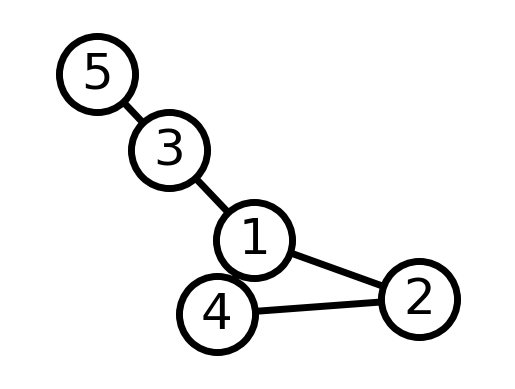

In [3]:
options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

G0 = nx.Graph()

V = {1, 2, 3, 4, 5}
E = [(1,2), (1,3), (1,4), (2,4), (3,5)]

G0.add_nodes_from(V)
G0.add_edges_from(E)

nx.draw_networkx(G0, **options)
# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

## Graph definitions

In [4]:
print(f"V = {G0.nodes}")
print(f"E = {G0.edges}")
print(f"Graph Order: {G0.number_of_nodes()}")
print(f"Graph Size: {G0.number_of_edges()}")
print(f"Degree for nodes: { {v: G0.degree(v) for v in G0.nodes}}")
print(f"Neighbors for nodes: { {v: list(G0.neighbors(v)) for v in G0.nodes} }") 

V = [1, 2, 3, 4, 5]
E = [(1, 2), (1, 3), (1, 4), (2, 4), (3, 5)]
Graph Order: 5
Graph Size: 5
Degree for nodes: {1: 3, 2: 2, 3: 2, 4: 2, 5: 1}
Neighbors for nodes: {1: [2, 3, 4], 2: [1, 4], 3: [1, 5], 4: [1, 2], 5: [3]}


# 2.2. Types of graphs

## 2.2.1. Undirected

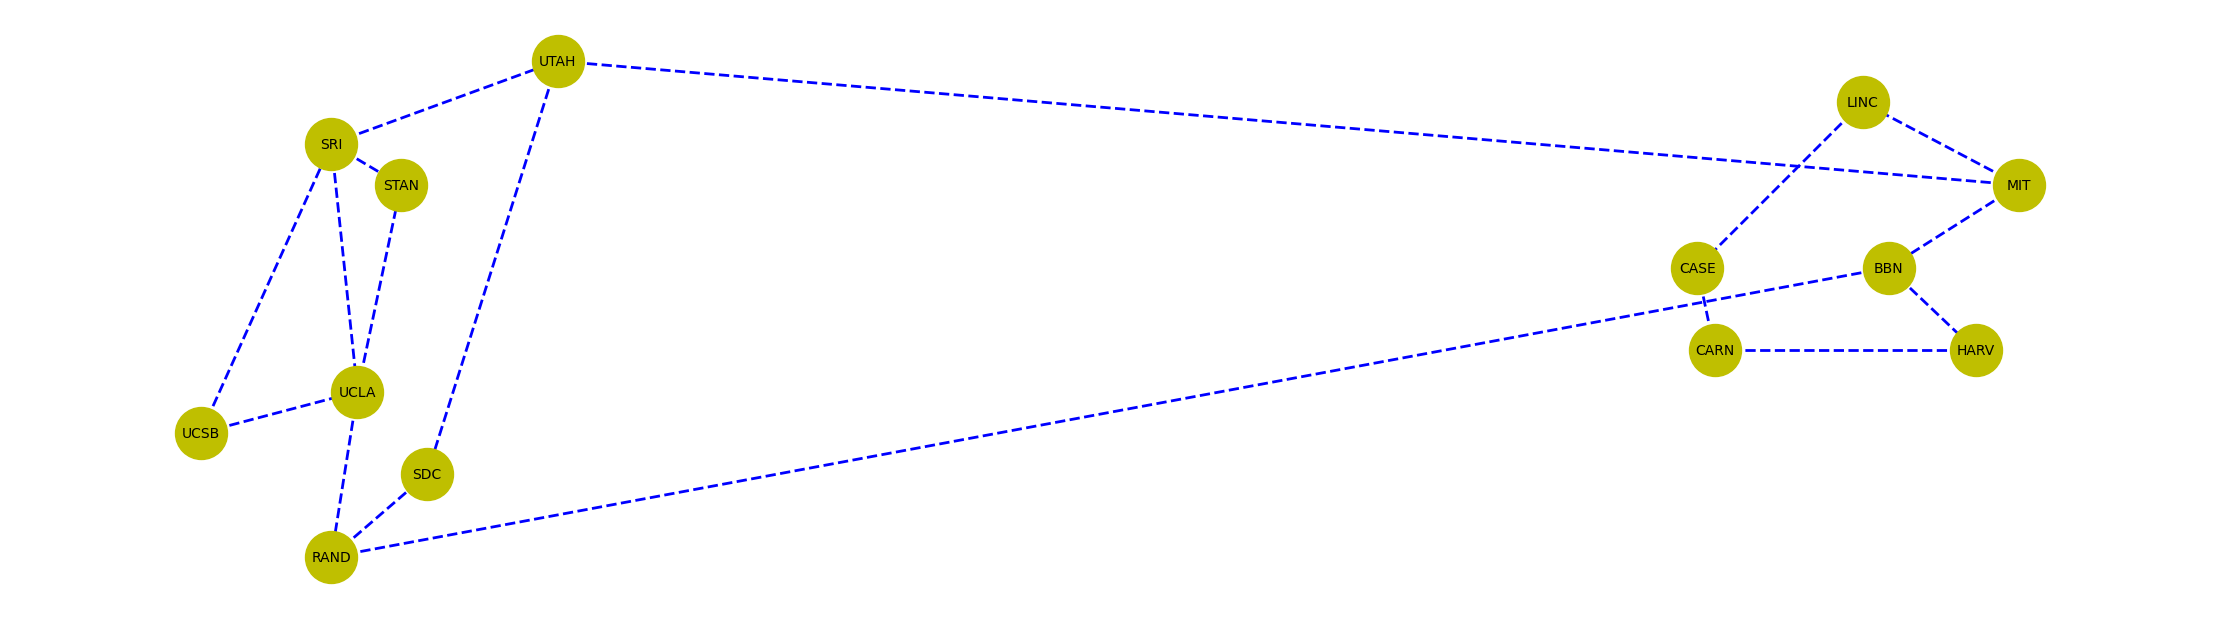

In [5]:
G1 = nx.read_adjlist("../data/arpa.adj")

opts = {"with_labels": True, "node_color": 'y', "style":"dashed", "width":2,
        "font_size": 10, "node_size": 1400, "edge_color": "b"}
pos = {
    'STAN': [2.9, 2.3], 'SRI': [2.1, 2.4], 'UCSB': [0.6, 1.7],
    'UCLA': [2.4, 1.8], 'RAND': [2.1, 1.4], 'SDC': [3.2, 1.6],
    'UTAH': [4.7, 2.6], 'BBN': [20, 2.1], 'CARN': [18, 1.9],
    'CASE': [17.8, 2.1], 'HARV': [21, 1.9], 'LINC': [19.7, 2.5],
    'MIT': [21.5, 2.3],
}

plt.figure(figsize=(22, 6))
nx.draw(G1, pos, **opts)
plt.show()

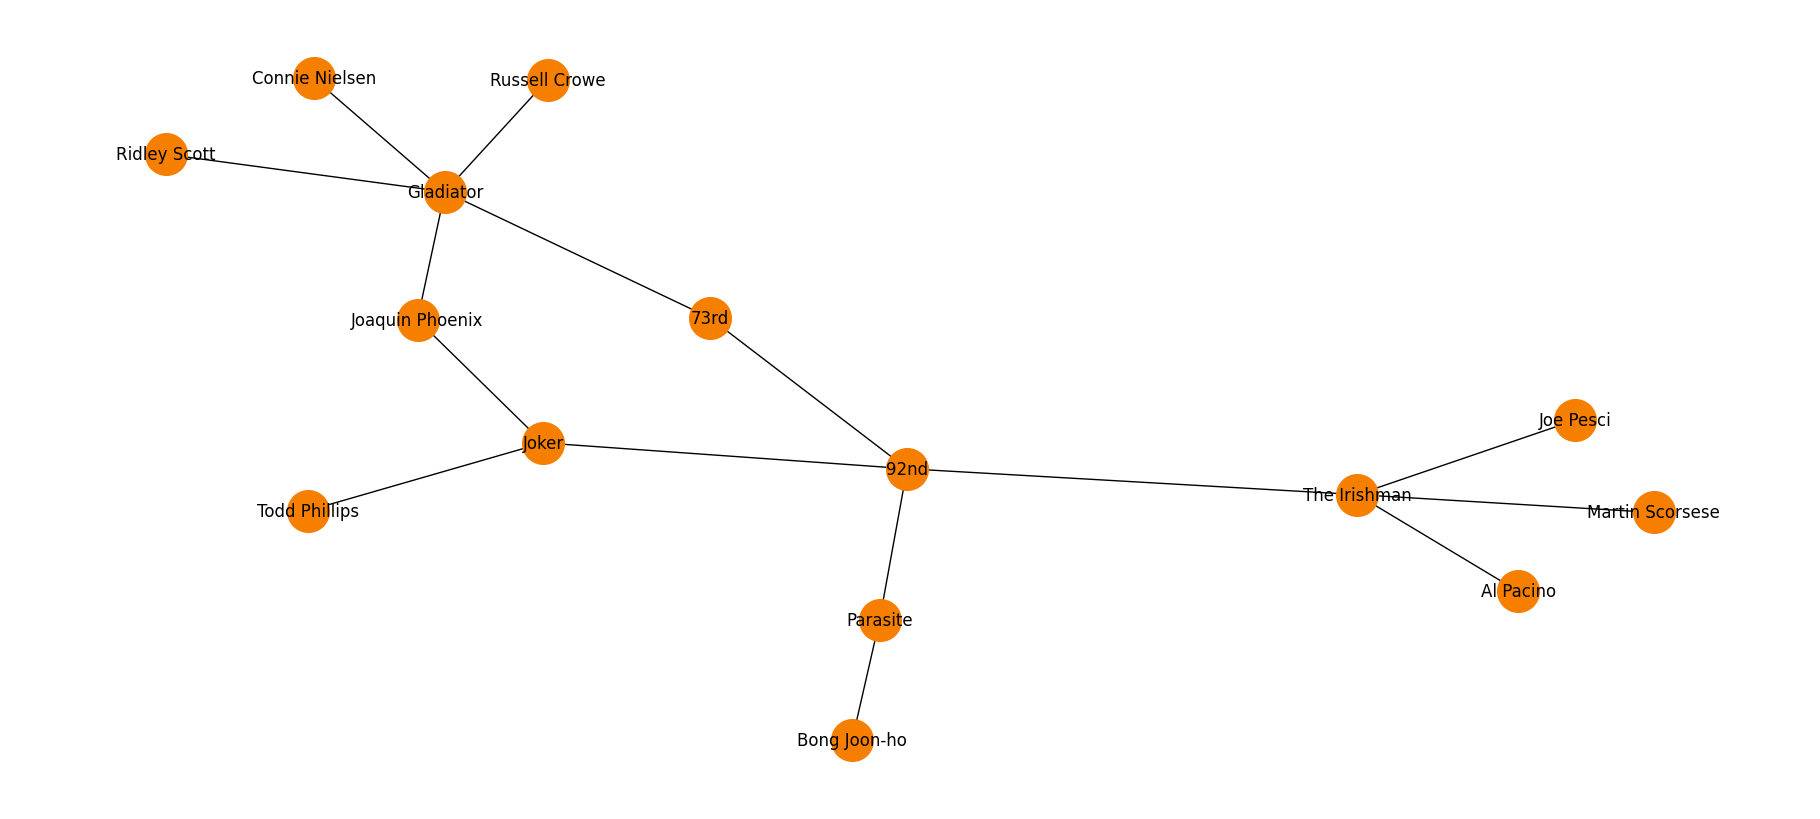

In [6]:
G2 = nx.Graph()

V = {
    "73rd", "Ridley Scott", "Russell Crowe", "Connie Nielsen", "92nd",
    "Parasite", "Bong Joon-ho", "The Irishman", "Al Pacino", "Joe Pesci",
    "Martin Scorsese", "Joaquin Phoenix", "Joker", "Todd Phillips"
}
E = [
    ("73rd", "92nd"), ("92nd", "73rd"), ("Gladiator", "73rd"),
    ("Ridley Scott", "Gladiator"), ("Joaquin Phoenix", "Gladiator"),
    ("Connie Nielsen", "Gladiator"), ("Russell Crowe", "Gladiator"),
    ("Parasite", "92nd"), ("The Irishman", "92nd"), ("Joker", "92nd"),
    ("Todd Phillips", "Joker"), ("Joaquin Phoenix", "Joker"),
    ("Bong Joon-ho", "Parasite"), ("Martin Scorsese", "The Irishman"),
    ("Al Pacino", "The Irishman"), ("Joe Pesci", "The Irishman")
]

G2.add_nodes_from(V)
G2.add_edges_from(E)

plt.figure(figsize=(18, 8))
nx.draw(G2, with_labels=True, font_family="sans-serif", node_size=900, node_color='#f77f00')
plt.show()

In [7]:
pos = nx.shell_layout(G2)
pos

{'Ridley Scott': array([-1.00000000e+00, -8.74227766e-08]),
 'Martin Scorsese': array([-0.91354543, -0.40673673]),
 'Al Pacino': array([-0.6691305 , -0.74314487]),
 'Joaquin Phoenix': array([-0.30901712, -0.95105648]),
 'Connie Nielsen': array([ 0.10452884, -0.99452186]),
 'Joker': array([ 0.49999991, -0.86602545]),
 'Parasite': array([ 0.80901724, -0.58778495]),
 '73rd': array([ 0.97814757, -0.20791176]),
 'Joe Pesci': array([0.97814751, 0.2079121 ]),
 'Bong Joon-ho': array([0.809017  , 0.58778524]),
 'Todd Phillips': array([0.49999961, 0.86602563]),
 'Russell Crowe': array([0.10452849, 0.99452192]),
 '92nd': array([-0.30901742,  0.95105636]),
 'The Irishman': array([-0.66913062,  0.74314481]),
 'Gladiator': array([-0.91354567,  0.4067362 ])}

## 2.2.2. Homogeneous and Heterogeneous

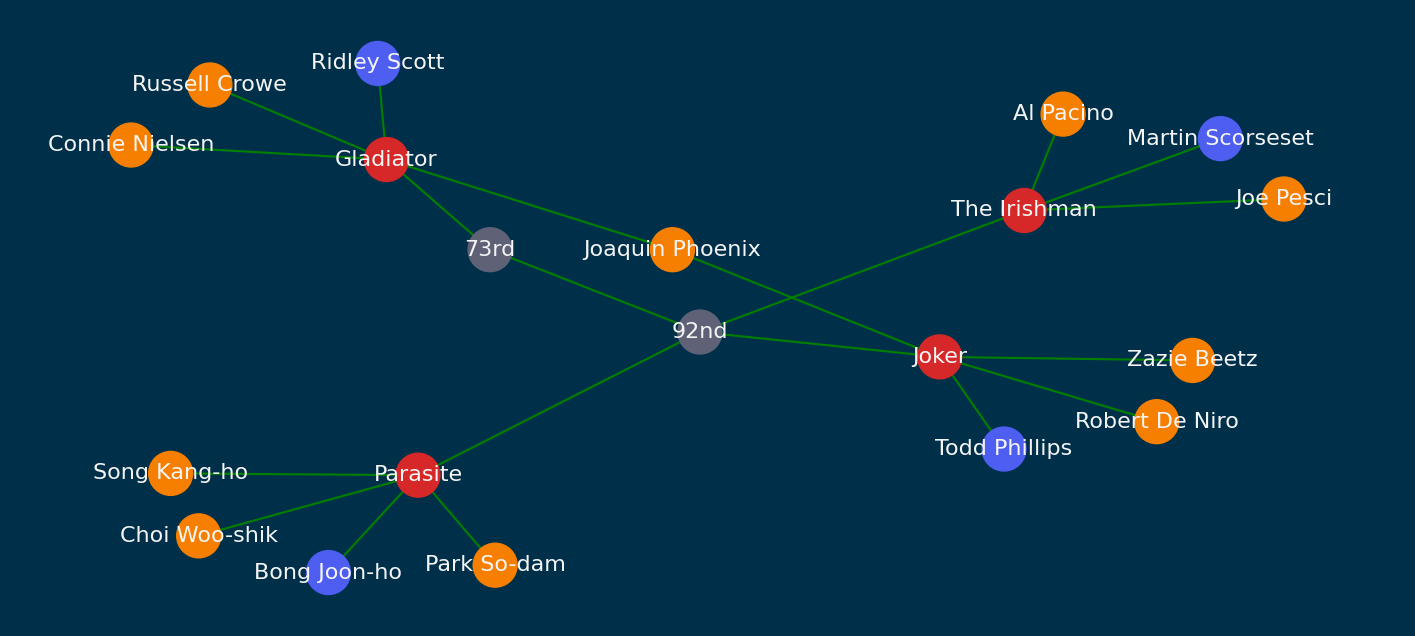

In [8]:
class OscarAward:
    def __init__(self, category: str, name: str):
        self.name = name
        self.category = category

    def __repr__(self):
        """Return the string representation of the Graph."""
        return self.name


class Award(OscarAward):
    def __init__(self, name) -> None:
        super().__init__(category="Ceremony", name=name)


class Movie(OscarAward):
    def __init__(self, name) -> None:
        super().__init__(category="Film", name=name)


class Nominee(OscarAward):
    def __init__(self, name, category) -> None:
        super().__init__(category, name=name)


G3 = nx.Graph()
act01 = Nominee(name="Joaquin Phoenix", category="Actor")
act02 = Nominee(name="Connie Nielsen", category="Actor")
act03 = Nominee(name="Russell Crowe", category="Actor")
act04 = Nominee(name="Joe Pesci", category="Actor")
act05 = Nominee(name="Al Pacino", category="Actor")
act06 = Nominee(name="Song Kang-ho", category="Actor")
act07 = Nominee(name="Choi Woo-shik", category="Actor")
act08 = Nominee(name="Park So-dam", category="Actor")
act09 = Nominee(name="Robert De Niro", category="Actor")
act10 = Nominee(name="Zazie Beetz", category="Actor")

dir01 = Nominee(name="Ridley Scott", category="Director")
dir02 = Nominee(name="Bong Joon-ho", category="Director")
dir03 = Nominee(name="Martin Scorseset", category="Director")
dir04 = Nominee(name="Todd Phillips", category="Director")

mov01 = Movie(name="Gladiator")
mov02 = Movie(name="Parasite")
mov03 = Movie(name="The Irishman")
mov04 = Movie(name="Joker")

awr73 = Award(name="73rd")
awr92 = Award(name="92nd")

G3.add_edges_from([
    (awr92, awr73), (awr73, awr92),
    (act01, mov01), (act02, mov01), (act03, mov01),
    (act06, mov02), (act07, mov02), (act08, mov02),
    (act04, mov03), (act05, mov03),
    (act01, mov04), (act09, mov04), (act10, mov04),
    (dir01, mov01), (dir02, mov02), (dir03, mov03), (dir04, mov04),
    (mov01, awr73), (mov02, awr92), (mov03, awr92), (mov04, awr92),
])

val_map = {
    'Ceremony': '#5F6276', 'Film': '#d62828', 'Actor': '#f77f00', 'Director': "#4D5EF0"
}
values = [val_map.get(node.category) for node in G3.nodes()]
labels = {n: n.name for n in G3.nodes()}

plot_graph(G=G3,values=values, labels=labels, name="graph-one")

In [9]:
nodes = list(G3.nodes())

G3.nodes()

NodeView((92nd, 73rd, Joaquin Phoenix, Gladiator, Connie Nielsen, Russell Crowe, Song Kang-ho, Parasite, Choi Woo-shik, Park So-dam, Joe Pesci, The Irishman, Al Pacino, Joker, Robert De Niro, Zazie Beetz, Ridley Scott, Bong Joon-ho, Martin Scorseset, Todd Phillips))

In [10]:
print(type(nodes[0]))
print(type(nodes[3]))
print(type(nodes[5]))

print(f'{nodes[1].category: <8} - {nodes[1].name}'.format('s'))
print(f'{nodes[3].category: <8} - {nodes[3].name}'.format('s'))
print(f'{nodes[5].category: <8} - {nodes[5].name}'.format('s'))

<class '__main__.Award'>
<class '__main__.Movie'>
<class '__main__.Nominee'>
Ceremony - 73rd
Film     - Gladiator
Actor    - Russell Crowe


## 2.2.3. Digraphs

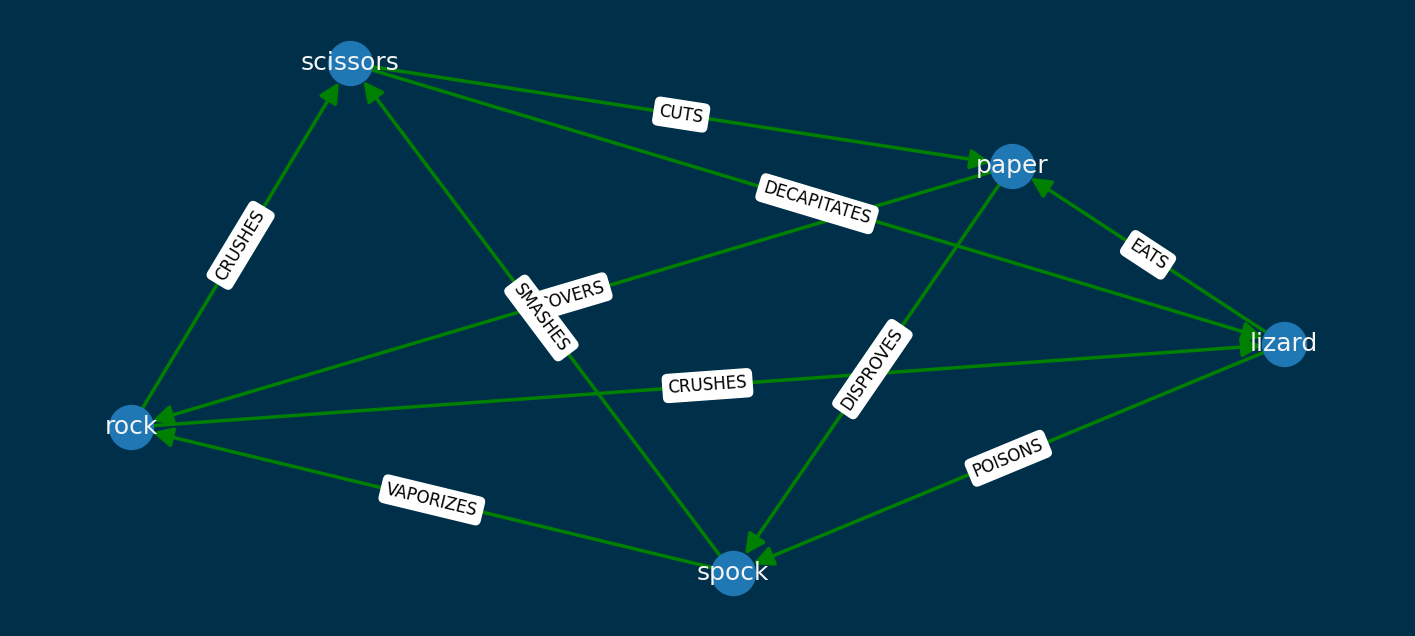

In [15]:
G4 = nx.DiGraph()

V = {"rock", "paper", "scissors", "spock", "lizard"}
E = [
    ("rock", "lizard"), ("rock", "scissors"),
    ("paper", "rock"), ("paper", "spock"),
    ("scissors", "paper"), ("scissors", "lizard"),
    ("spock", "scissors"), ("spock", "rock"),
    ("lizard", "spock"), ("lizard", "paper")
]

G4.add_nodes_from(V)
G4.add_edges_from(E)

pos = nx.spring_layout(G4)

edge_labels = {
    ('scissors', 'paper'): 'CUTS',
    ('paper', 'rock'): 'COVERS',
    ('rock', 'lizard'): 'CRUSHES',
    ('lizard', 'spock'): 'POISONS',
    ('spock', 'scissors'): 'SMASHES',
    ('scissors', 'lizard'): 'DECAPITATES',
    ('lizard', 'paper'): 'EATS',
    ('paper', 'spock'): 'DISPROVES',
    ('spock', 'rock'): 'VAPORIZES',
    ('rock', 'scissors'): 'CRUSHES'
}

opts = {
    "font_size": 18, "node_size": 1000, "font_color": "whitesmoke",
    "width": 2.5, "with_labels": True, "pos": pos, "arrowsize": 30,
    "font_family": "sans-serif", "edge_color": "green"
}

fig, ax = plt.subplots(figsize=(18, 8))
nx.draw_networkx(G4, **opts)

nx.draw_networkx_edge_labels(G4, pos=pos, edge_labels=edge_labels, font_size=12)

fig.set_facecolor('#003049')
ax.axis('off')
ax.margins(0.05)
plt.show()

In [16]:
print(f"Indegree for nodes: { {v: G4.in_degree(v) for v in G4.nodes} }")
print(f"Outdegree for nodes: { {v: G4.out_degree(v) for v in G4.nodes} }")

Indegree for nodes: {'lizard': 2, 'scissors': 2, 'rock': 2, 'spock': 2, 'paper': 2}
Outdegree for nodes: {'lizard': 2, 'scissors': 2, 'rock': 2, 'spock': 2, 'paper': 2}


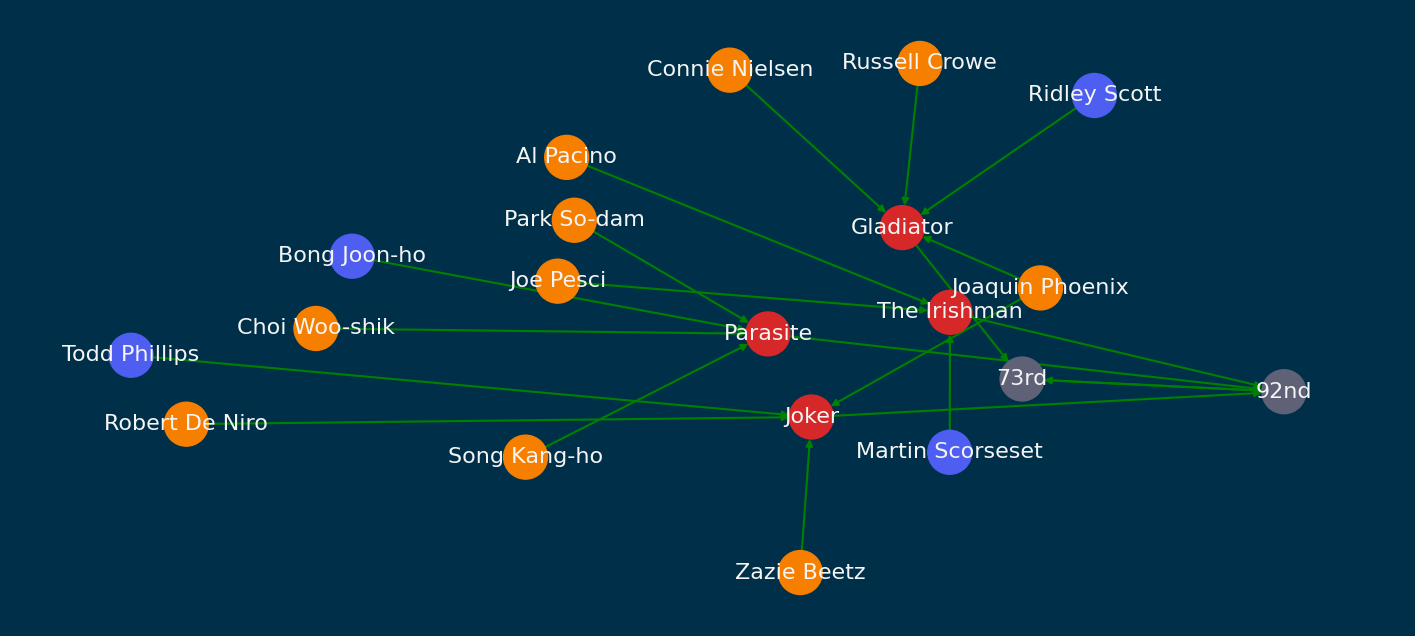

In [17]:
G5 = nx.DiGraph()

G5.add_edges_from([
    (awr92, awr73), (awr73, awr92),
    (act01, mov01), (act02, mov01), (act03, mov01),
    (act06, mov02), (act07, mov02), (act08, mov02),
    (act04, mov03), (act05, mov03),
    (act01, mov04), (act09, mov04), (act10, mov04),
    (dir01, mov01), (dir02, mov02), (dir03, mov03), (dir04, mov04),
    (mov01, awr73), (mov02, awr92), (mov03, awr92), (mov04, awr92),
])

plot_graph(G=G5,values=values, labels=labels, name="graph-two")

In [18]:
print(f"Indegree for nodes: { {v: G5.in_degree(v) for v in G5.nodes} }")
print(f"Outdegree for nodes: { {v: G5.out_degree(v) for v in G5.nodes} }")

Indegree for nodes: {92nd: 4, 73rd: 2, Joaquin Phoenix: 0, Gladiator: 4, Connie Nielsen: 0, Russell Crowe: 0, Song Kang-ho: 0, Parasite: 4, Choi Woo-shik: 0, Park So-dam: 0, Joe Pesci: 0, The Irishman: 3, Al Pacino: 0, Joker: 4, Robert De Niro: 0, Zazie Beetz: 0, Ridley Scott: 0, Bong Joon-ho: 0, Martin Scorseset: 0, Todd Phillips: 0}
Outdegree for nodes: {92nd: 1, 73rd: 1, Joaquin Phoenix: 2, Gladiator: 1, Connie Nielsen: 1, Russell Crowe: 1, Song Kang-ho: 1, Parasite: 1, Choi Woo-shik: 1, Park So-dam: 1, Joe Pesci: 1, The Irishman: 1, Al Pacino: 1, Joker: 1, Robert De Niro: 1, Zazie Beetz: 1, Ridley Scott: 1, Bong Joon-ho: 1, Martin Scorseset: 1, Todd Phillips: 1}


## 2.2.4. Multigraph

In [19]:
net= pd.read_csv('../data/sioux_falls/SiouxFalls_net.tntp', skiprows=8, sep='\t').drop(['~', ';'], axis =1)
net['edge']=net.index+1
flow=pd.read_csv('../data/sioux_falls/SiouxFalls_flow.tntp',sep='\t').drop(['From ', 'To '],axis=1)
flow.rename(columns={"Volume ": "flow", "Cost ": "cost"},inplace=True)
# Actual Sioux Falls coordinate
node_coord=pd.read_csv('../data/sioux_falls/SiouxFalls_node.tntp',sep='\t').drop([';'], axis=1)
# X,Y position for good visualization
node_xy=pd.read_csv('../data/sioux_falls/SiouxFalls_node_xy.tntp',sep='\t')

# dataframe containing all link attributes
sioux_falls_df=pd.concat([net,flow], axis=1)
sioux_falls_df

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type,edge,flow,cost
0,1,2,25900.200640,6,6,0.15,4,0,0,1,1,4494.657646,6.000816
1,1,3,23403.473190,4,4,0.15,4,0,0,1,2,8119.079948,4.008691
2,2,1,25900.200640,6,6,0.15,4,0,0,1,3,4519.079948,6.000834
3,2,6,4958.180928,5,5,0.15,4,0,0,1,4,5967.336396,6.573598
4,3,1,23403.473190,4,4,0.15,4,0,0,1,5,8094.657646,4.008587
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,23,22,5000.000000,4,4,0.15,4,0,0,1,72,9626.210200,12.243138
72,23,24,5078.508436,2,2,0.15,4,0,0,1,73,7902.983927,3.759304
73,24,13,5091.256152,4,4,0.15,4,0,0,1,74,11112.394731,17.617021
74,24,21,4885.357564,3,3,0.15,4,0,0,1,75,10259.524716,11.752579


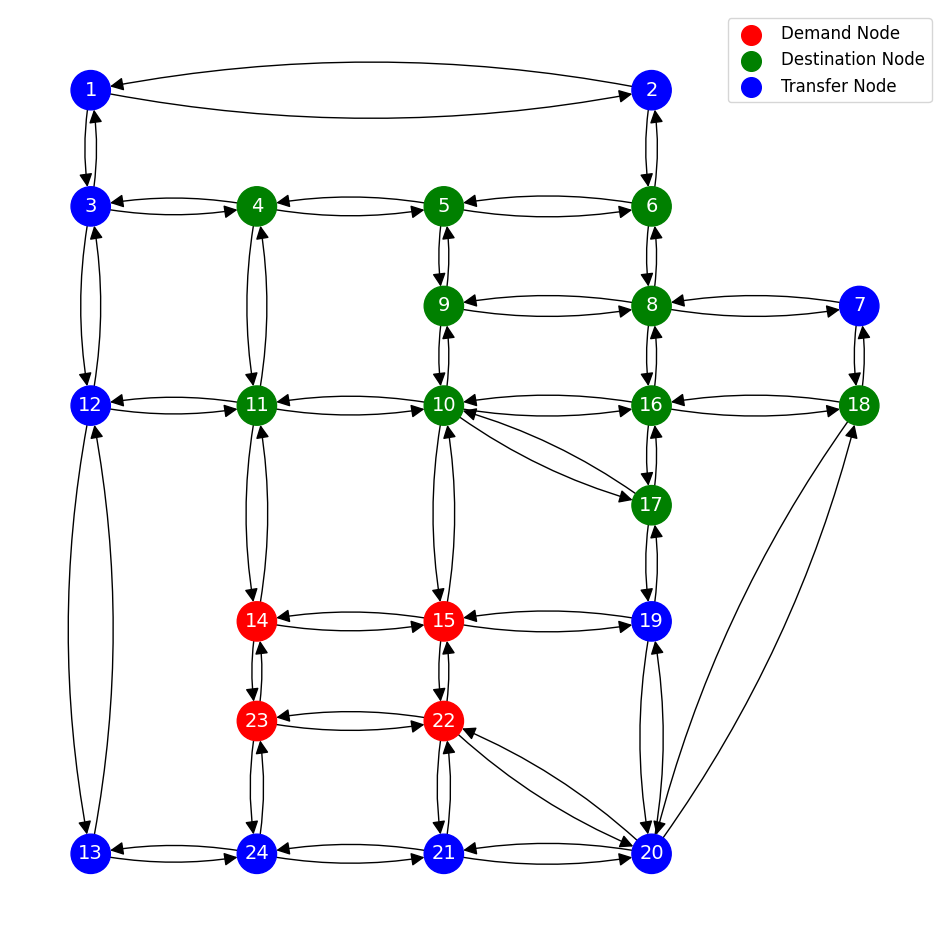

In [20]:
G6 = nx.from_pandas_edgelist(
    df=sioux_falls_df,
    source='init_node',
    target='term_node',
    edge_attr=['capacity', 'length', 'free_flow_time', 'b', 'power',
               'speed', 'toll', 'link_type', 'edge', 'flow', 'cost'],
    create_using=nx.MultiDiGraph())

# coordinate position
pos_coord = dict([(i, (a, b)) for i, a, b in zip(
    node_coord.Node, node_coord.X, node_coord.Y)])

for n, p in pos_coord.items():
    G6.nodes[n]['pos_coord'] = p

origin = [14, 15, 22, 23]
destination = [4, 5, 6, 8, 9, 10, 11, 16, 17, 18]

for n in G6.nodes:
    if n in destination:
        G6.nodes[n]['O/D'] = 'destination'
        G6.nodes[n]['color'] = 'green'
    elif n in origin:
        G6.nodes[n]['O/D'] = 'origin'
        G6.nodes[n]['color'] = 'red'
    else:
        G6.nodes[n]['O/D'] = 'transfer_node'
        G6.nodes[n]['color'] = 'blue'

# for better looking graph
pos_xy = dict(
    [(i, (a, b))
     for i, a, b in zip(node_xy.Node, node_xy.X, node_xy.Y)])

colors = [n[1]['color'] for n in G6.nodes.data()]
ax, fig = plt.subplots(figsize=(12, 12))
nx.draw_networkx(
    G6, connectionstyle='arc3, rad = 0.1',
    pos=pos_xy,
    with_labels=True,
    node_color=colors,
    arrows=True,
    arrowsize=20,
    node_size=800,
    font_color='white',
    font_size=14)

color_node_type = {'red': 'Demand Node',
                   'green': 'Destination Node', 'blue': 'Transfer Node'}
for c, n in color_node_type.items():
    fig.scatter([], [], c=c, label=n, s=200)
    fig.legend(loc='upper right', fontsize=12)

plt.axis("off")
plt.show()


## 2.2.5. Weighted graphs

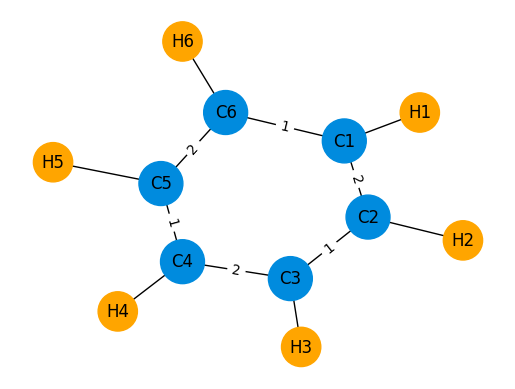

In [21]:

G7 = nx.Graph()

h_color, c_color = ("orange", "#008BDE")
# adding nodes
G7.add_nodes_from([
    ("C1", {"color": c_color, "size": 1000}), ("C2", {"color": c_color, "size": 1000}), 
    ("C3", {"color": c_color, "size": 1000}), ("C4", {"color": c_color, "size": 1000}), 
    ("C5", {"color": c_color, "size": 1000}), ("C6", {"color": c_color, "size": 1000}),
    ("H1", {"color": h_color, "size":  800}), ("H2", {"color": h_color, "size":  800}), 
    ("H3", {"color": h_color, "size":  800}), ("H4", {"color": h_color, "size":  800}), 
    ("H5", {"color": h_color, "size":  800}), ("H6", {"color": h_color, "size":  800})
])

# adding edges
G7.add_edges_from([
    ("C1", "C2", {"weight": 2}), ("C2", "C3", {"weight": 1}), 
    ("C3", "C4", {"weight": 2}), ("C4", "C5", {"weight": 1}), 
    ("C5", "C6", {"weight": 2}), ("C6", "C1", {"weight": 1}),
    ("C1", "H1"), ("C2", "H2"), ("C3", "H3"), 
    ("C4", "H4"), ("C5", "H5"), ("C6", "H6")])

colors = list(nx.get_node_attributes(G7, "color").values())
sizes = list(nx.get_node_attributes(G7, "size").values())
edge_labels = {(u, v): d.get('weight') or '' for u, v, d in G7.edges(data=True)}

#pos = nx.spring_layout(G)
pos = {
    'C1': (0.400,  0.450), 'C2': (0.510, -0.086), 'C3': (0.150, -0.519),
    'C4': (-0.350, -0.400), 'C5': (-0.450,  0.150), 'C6': (-0.150,  0.650),
    'H1': (0.750,  0.650), 'H2': (0.950, -0.250), 'H3': (0.200, -1.000),
    'H4': (-0.650, -0.750), 'H5': (-0.950,  0.300), 'H6': (-0.350,  1.150)
}

nx.draw_networkx_nodes(G7, pos, node_color=colors, node_size=sizes)
nx.draw_networkx_edges(G7, pos)
nx.draw_networkx_edge_labels(G7, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G7, pos, labels={node: node for node in G7.nodes()})

plt.axis("off")
plt.show()


In [22]:
# Grab edge list data hosted on Gist
edgelist = pd.read_csv('https://meriatblog.blob.core.windows.net/draft/gnn-intro/sleeping_edgelist_giant.csv')

# Preview edgelist
edgelist.head(5)

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0


In [23]:
# Grab node list data hosted on Gist
nodelist = pd.read_csv('https://meriatblog.blob.core.windows.net/draft/gnn-intro/sleeping_nodelist_giant.csv')

# Preview nodelist
nodelist.head(5)

,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771


In [24]:
# Create empty graph
G8 = nx.Graph()

# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
    # g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())  # deprecated after NX 1.11
    G8.add_edge(elrow[0], elrow[1], **elrow[2:].to_dict())

# Add node attributes
for i, nlrow in nodelist.iterrows():
    # g.node[nlrow['id']] = nlrow[1:].to_dict()  # deprecated after NX 1.11
    nx.set_node_attributes(G8, {nlrow['id']:  nlrow[1:].to_dict()})

print(f'# of edges: {G8.number_of_edges()}')
print(f'# of nodes: {G8.number_of_nodes()}')

# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in G8.nodes(data=True)}

# Define data structure (list) of edge colors for plotting
edge_colors = [e[2]['color'] for e in list(G8.edges(data=True))]

# of edges: 123
# of nodes: 77


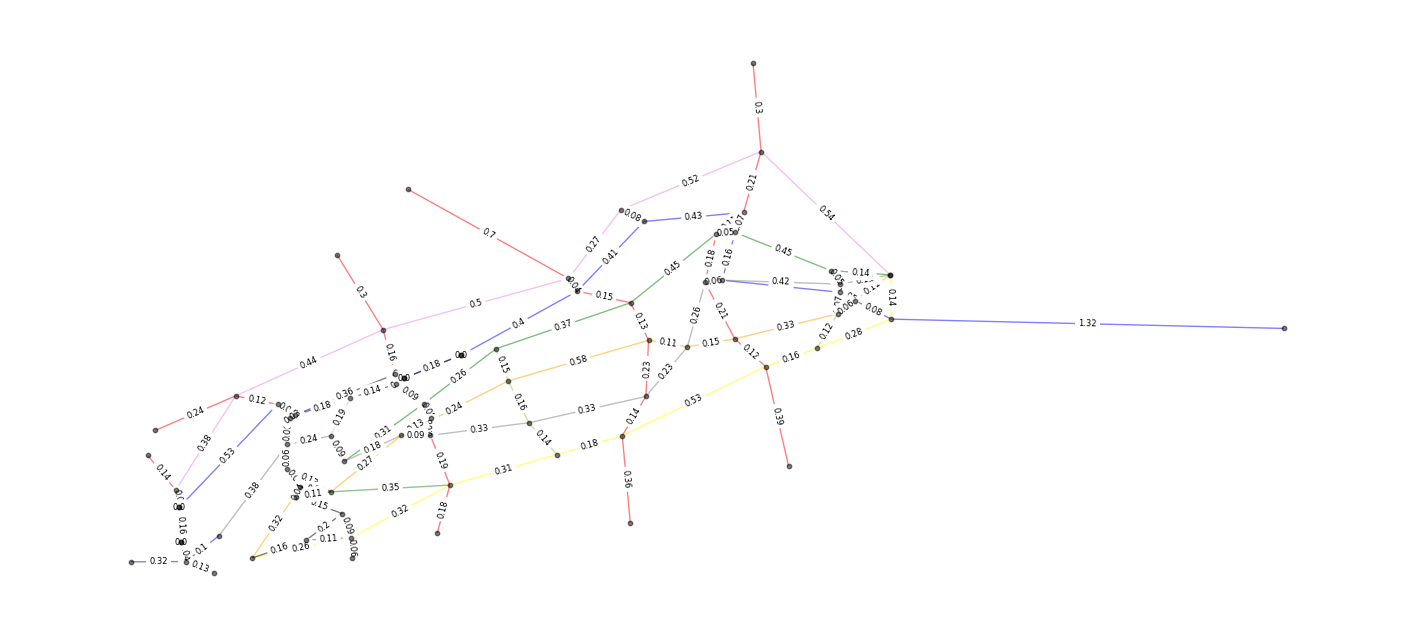

In [26]:
plt.figure(figsize=(18, 8))

edge_colors = [e[2]['color'] for e in G8.edges(data=True)]
nx.draw_networkx(G8, pos=node_positions, node_size=10, node_color='black', edge_color=edge_colors, alpha=0.5, with_labels=False)

edge_labels = {(e[0], e[1]): str(e[2]['distance']) for e in list(G8.edges(data=True))}
nx.draw_networkx_edge_labels(G8, pos=node_positions, edge_labels=edge_labels, font_size=6)

plt.axis('off')
plt.show()